In [12]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
#For Graphical Representation
import matplotlib.pyplot as plt
import numpy as np

In [11]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True,train=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True,train=False,transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

In [17]:
#Functions for graphical representation
def imshow(image, ax=None, title=None, normalize=True):
    
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax
def view_classify(img, ps):
   
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    
    
    
    ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [8]:
#Defining the network architecture
class CLassiflier(nn.Module):
    def __init__(self):
        super().__init__()
        self.f1 = nn.Linear(784,256)
        self.f2 = nn.Linear(256,128)
        self.f3 = nn.Linear(128,64)
        self.f4 = nn.Linear(64,10)
        self.dropout = nn.Dropout(p=0.3)

    def forward(self,x):
        x = x.view(x.shape[0],-1)

        x = self.dropout(F.relu(self.f1(x)))
        x = self.dropout(F.relu(self.f2(x)))
        x = self.dropout(F.relu(self.f3(x)))
        x = F.log_softmax(self.f4(x))
        return x

In [9]:
#Creating a model and training it
model = CLassiflier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.003)

epoches = 25

for e in range (epoches):
    run_loss = 0
    for images,labels in trainloader:
        logps = model(images)
        loss = criterion(logps,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        run_loss += loss.item()
    else:
        print(f'Training_Loss {run_loss/len(trainloader)}')


Training_Loss 0.6674676420909764
Training_Loss 0.529971847020741
Training_Loss 0.5022888747073694
Training_Loss 0.48825165087670913
Training_Loss 0.47687148501369747
Training_Loss 0.4671011751076814
Training_Loss 0.46032026559432176
Training_Loss 0.457461283373426
Training_Loss 0.45124863185036157
Training_Loss 0.4527285294110841
Training_Loss 0.4399517699281798
Training_Loss 0.44062389631960186
Training_Loss 0.43649000591878445
Training_Loss 0.4381156074308129
Training_Loss 0.4324634937462268
Training_Loss 0.4302539824486287
Training_Loss 0.4299870371373732
Training_Loss 0.424076030010989
Training_Loss 0.4162567868304532
Training_Loss 0.4269379368468897
Training_Loss 0.42571438075319284
Training_Loss 0.4201391854329404
Training_Loss 0.4151410382471359
Training_Loss 0.4142526709226403
Training_Loss 0.4248873184659461


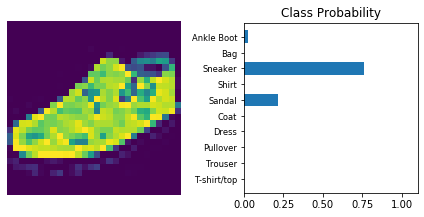

In [20]:
#Testing the Model
data = iter(testloader)
images,labels = data.next()
img = images[0]

with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)

view_classify(img, ps)